In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/Week 2/T5_Phase4/Data_Analysis/Content/Extra Excercises/Datasets/Used_Cars.csv')

# Data Exploration

In [5]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [140]:
df['Name'].nunique()

1780

In [141]:
df['Location'].nunique()

11

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [39]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Diesel,3205
Petrol,2746
CNG,56
LPG,10
Electric,2


# Visualazation

In [12]:
grouped_data = df.groupby('Year')['Price'].mean()


fig = px.bar(grouped_data, x=grouped_data.index, y='Price', title='Avg Price by Year', color_discrete_sequence=['#DD5050'])

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=grouped_data.index,
        ticktext=grouped_data.index
    )
)
fig.show()

# Cleaning

In [13]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Power'] = df['Power'].str.extract(r'(\d+)').astype('float')
df['Engine'] = df['Engine'].str.extract(r'(\d+)').astype('float')
df['Mileage'] = df['Mileage'].str.extract(r'(\d+\.\d+)').astype('float') # ask

In [16]:
df.dropna(subset=["Mileage"], inplace=True)

In [17]:
# df.hist(figsize=(10, 10), bins=50);

fig = px.histogram(df, x="Kilometers_Driven")
fig.show()

fig = px.histogram(df, x="Mileage")
fig.show()

fig = px.histogram(df, x="Engine")
fig.show()


fig = px.histogram(df, x="Power")
fig.show()

fig = px.histogram(df, x="Seats")
fig.show()

fig = px.histogram(df, x="Price")
fig.show()

# Handling Outliers

### Kilometers_Driven outlier

In [21]:
# box plot before removing outliers in Kilometers_Driven
# df['Kilometers_Driven'].plot.box(figsize=(20,15))

fig = px.box(df, y="Kilometers_Driven" )
fig.show()

In [22]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df = remove_outliers(df, 'Kilometers_Driven')

In [23]:
# box plot after removing outliers in Kilometers_Driven
fig = px.box(df, y="Kilometers_Driven" )
fig.show()

In [65]:
df.shape

(5817, 13)

### Mileage outlier

In [13]:
df[df['Mileage'] <= 5]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14 Lakh,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,Hyundai Santro LP - Euro II,Chennai,2005,105000,Petrol,Manual,First,0.0,999.0,NaN,5.0,NaN,1.75
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14 Lakh,35.00
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,NaN,1.39


In [24]:
df.drop(index=df[df['Mileage'] <= 5].index, inplace=True)

### Engine outlier

In [15]:
# df[(df['Engine'] >= 4000) | (df['Engine'] <= 500)]
df[(df['Engine'] <= 500)]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58 Lakh,13.0


In [25]:
df.drop(index=df[(df['Engine'] <= 500)].index, inplace=True)

### Seat outlier

In [89]:
df[df['Seats'] < 2 ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,NaN,18.0


In [26]:
df.drop(index=df[df['Seats'] < 2 ].index, inplace=True)

### Price outlier

In [27]:
fig = px.box(df, y="Price" )
fig.show()

In [28]:
df.drop(index=df[(df['Price']>80) | (df['Price'] < 1 )].index, inplace=True)

# Correlation

In [30]:
corr_matrix= df.corr(numeric_only=True)
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.512122,0.284607,-0.075266,-0.018719,0.035959,0.296883
Kilometers_Driven,-0.512122,1.000000,-0.126554,0.167114,0.031917,0.183769,-0.176815
Mileage,0.284607,-0.126554,1.000000,-0.646322,-0.566572,-0.336627,-0.351340
Engine,-0.075266,0.167114,-0.646322,1.000000,0.875458,0.394018,0.672327
Power,-0.018719,0.031917,-0.566572,0.875458,1.000000,0.119441,0.776446
Seats,0.035959,0.183769,-0.336627,0.394018,0.119441,1.000000,0.088478
Price,0.296883,-0.176815,-0.351340,0.672327,0.776446,0.088478,1.000000


<Axes: >

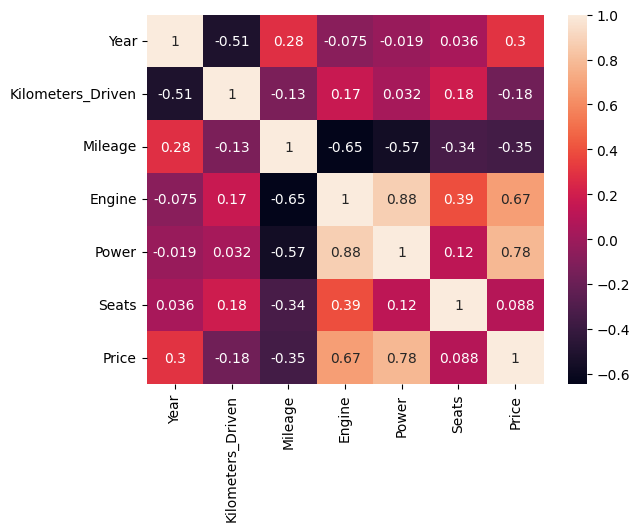

In [31]:
sns.heatmap(corr_matrix, annot=True)

Featurs that have a high correlation to price (target):
Power - Engine

Featurs that have a low correlation to price (target):
Mileage - Engine - Kilometers_Driven

Featurs that have no correlation to price (target):
Seats - year

____________________________________________

no features have a high correlation to each other

**i will drop Seats - year columns due to no correlation**

# Splitting data

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop("Price", axis=1) # drop labels for training set
y = df["Price"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [63]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
4150,Hyundai i10 Magna 1.2,Jaipur,2011,40496,Petrol,Manual,First,20.36,1197.0,78.0,5.0,NaN
1055,Maruti Swift Dzire LDI,Delhi,2014,68462,Diesel,Manual,First,26.59,1248.0,74.0,5.0,NaN
1671,Maruti Swift VXI,Coimbatore,2016,18094,Petrol,Manual,Second,18.60,1197.0,85.0,5.0,NaN
1229,Chevrolet Beat LT,Pune,2012,78000,Petrol,Manual,Second,18.60,1199.0,79.0,5.0,NaN
2629,Maruti Ertiga ZDI,Hyderabad,2013,120000,Diesel,Manual,First,20.77,1248.0,88.0,7.0,NaN


In [33]:
# remove unnecessary columns
X_train.drop(columns=['Name', 'Seats', 'Year','Location'], inplace=True)
X_test.drop(columns=['Name','Seats', 'Year', 'Location'], inplace=True)


# handling null values

In [34]:
df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,23
Power,87


In [35]:
# in New_Price column, there are a lot of null values, so dropping them is the right solution.
X_train.drop(columns=['New_Price'], inplace=True)
X_test.drop(columns=['New_Price'], inplace=True)

In [36]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)


# X_train['Seats'] = imputer.fit_transform(X_train[['Seats']])
# X_test['Seats'] = imputer.transform(X_test[['Seats']])

X_train['Power'] = imputer.fit_transform(X_train[['Power']])
X_test['Power'] = imputer.transform(X_test[['Power']])

X_train['Engine'] = imputer.fit_transform(X_train[['Engine']])
X_test['Engine'] = imputer.transform(X_test[['Engine']])

In [37]:
X_train.isnull().sum()

,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [70]:
X_test.isnull().sum()

,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


# Scalling and Eccoding

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_pip = make_pipeline(MinMaxScaler())
cat_pip_one_hot = make_pipeline(OneHotEncoder())
cat_pip_ordinal = make_pipeline(OrdinalEncoder())

# Owner_Type > ordinal encode_long
# transmi > one hot
# Fuel_Type > one hot

pre_pip = ColumnTransformer([
    ('num', num_pip, ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']),
    ('cat_one_hot', cat_pip_one_hot, ['Transmission', 'Fuel_Type']),
    ('cat_ordinal', cat_pip_ordinal, ['Owner_Type' ])
    ])


In [39]:
X_train_prepared = pre_pip.fit_transform(X_train)
X_test_prepared = pre_pip.transform(X_test)

# ML model

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train_prepared, y_train)

LinearRegression()

In [41]:
score = model.score(X_test_prepared, y_test)
score

0.7083961908369527

In [44]:
# testing set
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test_prepared)
mae = mean_absolute_error(y_test, y_pred)
mae

3.5842388314260565

In [45]:
# training set
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_train_prepared)
mae = mean_absolute_error(y_train, y_pred)
mae

3.842697925836268

The MAE in training and testing are almost the same, so we have no outlier.

## Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()


model2.fit(X_train_prepared, y_train)

DecisionTreeRegressor()

In [47]:
score = model2.score(X_test_prepared, y_test)
score

0.725629578300313

In [48]:
from sklearn.metrics import mean_absolute_error

y_pred = model2.predict(X_test_prepared)
mae = mean_absolute_error(y_test, y_pred)
mae

2.659345657276995

In [49]:
from sklearn.metrics import mean_absolute_error

y_pred = model2.predict(X_train_prepared)
mse = mean_absolute_error(y_train, y_pred)
mse

0.036482541079812206

### prevent overfitting

In [50]:
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [3, 4, 5, 6, 7, 8]}


model2 = DecisionTreeRegressor()

gd = GridSearchCV(model2, param)

gd.fit(X_train_prepared, y_train)

# ______________more then one hyperparam________________

param = {'max_depth': [3, 4, 5, 6, 7, 8],
         'max_leaf_nodes': [7, 9]
         }


model2 = DecisionTreeRegressor()

gd = GridSearchCV(model2, param)

gd.fit(X_train_prepared, y_train) # training 12 model and find the best param

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [7, 9]})

In [51]:
gd.best_params_

{'max_depth': 4, 'max_leaf_nodes': 9}

In [52]:
from sklearn.metrics import mean_absolute_error

y_pred = gd.predict(X_test_prepared)
mse = mean_absolute_error(y_test, y_pred)
mse

3.131519065442629

In [53]:
from sklearn.metrics import mean_absolute_error

y_pred = gd.predict(X_train_prepared)
mse = mean_absolute_error(y_train, y_pred)
mse

3.3100488133267816

## KNN

In [54]:
from sklearn.neighbors import KNeighborsRegressor

model3 = KNeighborsRegressor(n_neighbors=5)

model3.fit(X_train_prepared, y_train)

KNeighborsRegressor()

In [55]:
score = model3.score(X_test_prepared, y_test)
score

0.7692429041070092

In [57]:
from sklearn.metrics import mean_absolute_error

y_pred = model3.predict(X_test_prepared)
mae = mean_absolute_error(y_test, y_pred)
mae

2.577744718309859

In [58]:
from sklearn.metrics import mean_absolute_error

y_pred = model3.predict(X_train_prepared)
mae = mean_absolute_error(y_train, y_pred)
mae

2.2361395246478875